In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [42]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

### Data Analysis

#### Checking for missing values, observing the data type etc

In [43]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### About the data 

age: Age of the patient

anaemia: If the patient had the haemoglobin below the normal range

creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L

diabetes: If the patient was diabetic

ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction

high_blood_pressure: If the patient had hypertension

platelets: Platelet count of blood in kiloplatelets/mL

serum_creatinine: The level of serum creatinine in the blood in mg/dL

serum_sodium: The level of serum sodium in the blood in mEq/L

sex: The sex of the patient

smoking: If the patient smokes actively or ever did in past

time: It is the time of the patient's follow-up visit for the disease in months

DEATH_EVENT: If the patient deceased during the follow-up period

In [45]:
df.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [46]:
df.shape

(299, 13)

#### Checking for Duplicate

In [47]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


#### Data Analysis 

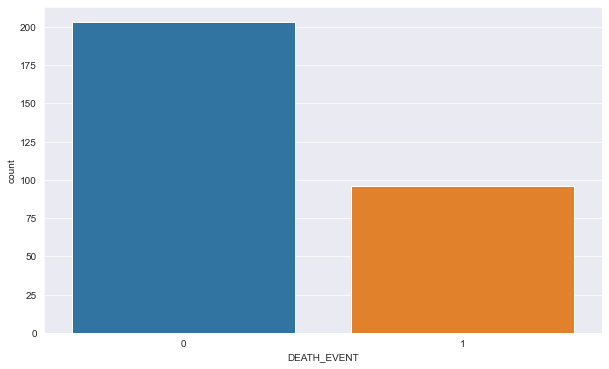

In [48]:
ax = sns.countplot(x='DEATH_EVENT' , data = df)

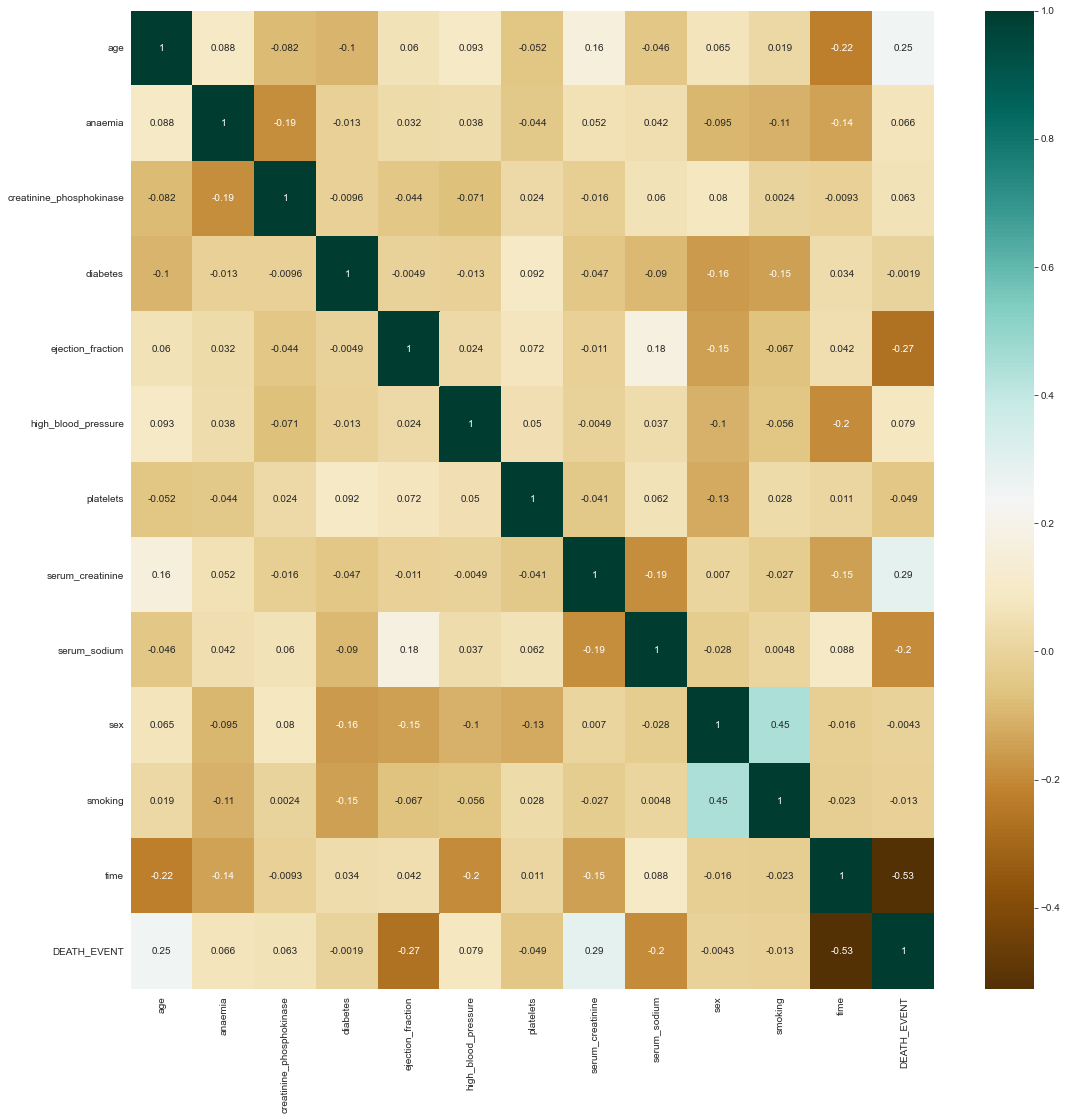

In [49]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

We observe that time of the patient's follow up is inversely proportional to death. i.e. it reduces the chances. 

Ejection fraction is the second most important factor, followed by age 

####  Visualizing the Boxplot 

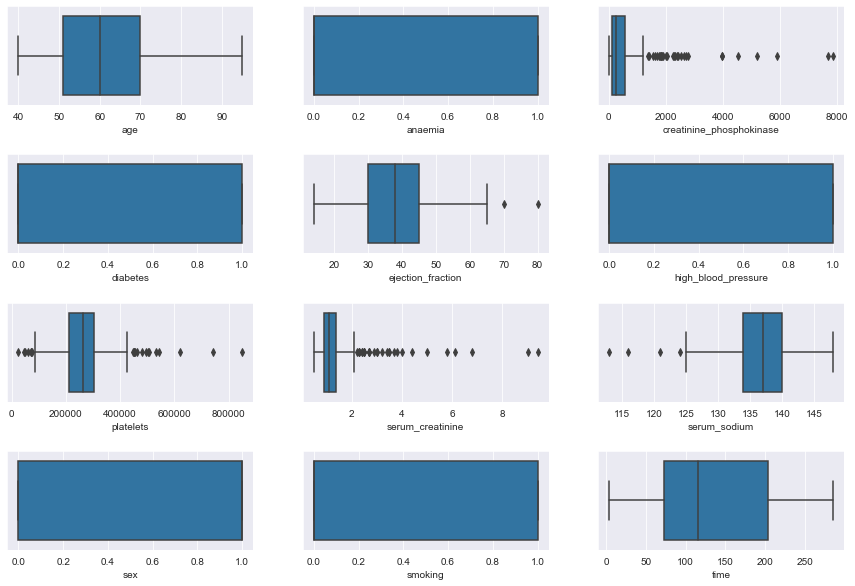

In [50]:
fig, axes = plt.subplots(figsize=(15,10))

plt.subplot(4,3,1)
sns.boxplot(x=df['age'])

plt.subplot(4,3,2)
sns.boxplot(x=df['anaemia'])

plt.subplot(4,3,3)
sns.boxplot(x=df['creatinine_phosphokinase'])

plt.subplot(4,3,4)
sns.boxplot(x=df['diabetes'])

plt.subplot(4,3,5)
sns.boxplot(x=df['ejection_fraction'])

plt.subplot(4,3,6)
sns.boxplot(x=df['high_blood_pressure'])

plt.subplot(4,3,7)
sns.boxplot(x=df['platelets'])

plt.subplot(4,3,8)
sns.boxplot(x=df['serum_creatinine'])

plt.subplot(4,3,9)
sns.boxplot(x=df['serum_sodium'])

plt.subplot(4,3,10)
sns.boxplot(x=df['sex'])

plt.subplot(4,3,11)
sns.boxplot(x=df['smoking'])

plt.subplot(4,3,12)
sns.boxplot(x=df['time'])


plt.subplots_adjust(wspace=0.2, hspace=0.5)

#### Removing the outliers 

  The high value of parameters such as creatinine_phosphokinase,serum_creatinine etc. are not have outliers truly as such high values are possible.

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Data Preprocessing 

In [52]:
x = df.iloc[:,  :-1 ]
y = df.iloc[:,-1]

In [53]:
print(x)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

### Splitting the Dataset into Test Set and Training Set 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [55]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building and Compiling the ANN 

In [56]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [57]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
# Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6904
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6946
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6946
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6946
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.6946
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6946
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6946
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6946
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6946
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6946
Epoch 11/500
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8661
Epoch 85/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8661
Epoch 86/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8661
Epoch 87/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8661
Epoch 88/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8703
Epoch 89/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8661
Epoch 90/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8703
Epoch 91/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8703
Epoch 92/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8745
Epoch 93/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8703
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8870
Epoch 168/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8828
Epoch 169/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8828
Epoch 170/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8870
Epoch 171/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8828
Epoch 172/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8828
Epoch 173/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8828
Epoch 174/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8870
Epoch 175/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8870
Epoch 176/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8870
Epoch 177/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.8996
Epoch 250/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.8996
Epoch 251/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.8996
Epoch 252/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.8996
Epoch 253/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.8996
Epoch 254/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.8996
Epoch 255/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8954
Epoch 256/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.8996
Epoch 257/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.8996
Epoch 258/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.8996
Epoch 259/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9205
Epoch 332/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9205
Epoch 333/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9205
Epoch 334/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9205
Epoch 335/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9205
Epoch 336/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9205
Epoch 337/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.9205
Epoch 338/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9205
Epoch 339/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.9205
Epoch 340/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9205
Epoch 341/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9414
Epoch 414/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9331
Epoch 415/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9372
Epoch 416/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9372
Epoch 417/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.9456
Epoch 418/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9456
Epoch 419/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9456
Epoch 420/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9456
Epoch 421/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9456
Epoch 422/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.9414
Epoch 423/500
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9414
Epoch 496/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9414
Epoch 497/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9414
Epoch 498/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9414
Epoch 499/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9372
Epoch 500/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9414


#### Evaluating the ANN 

In [59]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 2ms/step


In [71]:
# list to score accuracy_score
model_scores = []

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred  )
model_scores.append(ac)
print(cm,ac)

[[36  1]
 [ 7 16]] 0.8666666666666667


###  Implementing some other Machine learning models 

#### Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [74]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
# print(y_pred)

In [75]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
model_scores.append(ac)
print(cm,ac)

[[35  2]
 [ 9 14]] 0.8166666666666667


#### Random Forest 

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [77]:
y_pred = classifier.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
model_scores.append(ac)
print(cm,ac)

[[36  1]
 [ 7 16]] 0.8666666666666667


### Visualizing the Performance of the Models 

In [68]:
model_list = [ "ANN", "DecisionTree","RandomForest"   ]

In [69]:
model_scores

[0.7333333333333333, 0.8166666666666667, 0.8666666666666667]

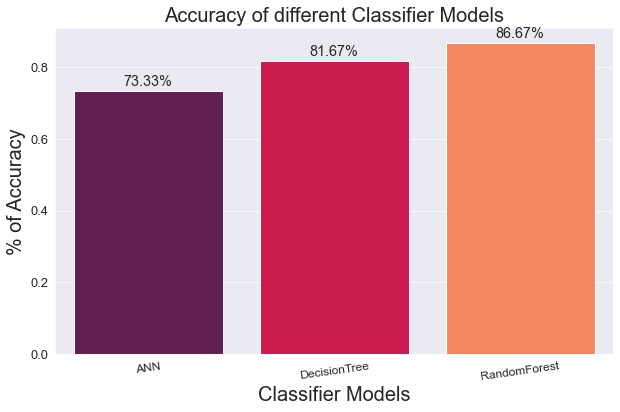

In [70]:
plt.rcParams['figure.figsize']=  10,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=model_list, y=model_scores, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()